In [211]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
from plot_keras_history import show_history, plot_history
from tensorflow.keras import Sequential, layers
import os


### **Spaceship Titanic competition from Kaggle**

Setting up the data from the already unzipped file

In [212]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")
sample_submission_data = pd.read_csv("data/sample_submission.csv")

train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [213]:
test_data.head(4)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter


In [214]:
# Checking null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [215]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [216]:
train_data.Cabin.value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [217]:
train_data.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

Want to keep "Passanger Id" so I can use it as index later for the test data. I create a float from that column and
also need to normalize data later and replace False and True in the "Transported" column to 0 and 1.

In [218]:
train_data["PassengerId"] = pd.factorize(train_data["PassengerId"])[0].astype(float)

train_data["Transported"] = train_data["Transported"].replace({False:0, True:1})

train_data.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0.0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,1.0,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,2.0,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0


In [219]:
train_data.isnull().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
Transported     False
dtype: bool

In [220]:
train_data = train_data.dropna(how='any',axis=0) 

In [221]:
ct = make_column_transformer(
    (MinMaxScaler(), ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "PassengerId"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["HomePlanet", "Destination", "VIP", "CryoSleep"])
)

In [222]:
# Creating x and y dropping Cabin value and Name

x = train_data.drop(["Cabin", "Name"], axis=1)
y = train_data["Transported"]

# Build our train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(x_train)

# Transform training and test data with normalization (MinMaxScaler, OneHotEncoder)

x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [223]:
x_train.shape, x_test.shape

((5284, 12), (1322, 12))

In [224]:
# Creating modelcheckpoint function so I can load the best model later that I can evaluate data later on

def modelcheckpoint(model, filepath="spaceship_model/"):
    name=".hdf5"
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(filepath, model, name), monitor='val_accuracy',verbose=0,save_best_only= True)
    return model_checkpoint

In [225]:
x_train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
7832,7832.0,Europa,False,55 Cancri e,25.0,False,0.0,1673.0,0.0,642.0,612.0,0
5842,5842.0,Europa,False,TRAPPIST-1e,36.0,False,0.0,2624.0,1657.0,2799.0,1.0,0
3928,3928.0,Mars,True,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,1
4091,4091.0,Earth,True,55 Cancri e,37.0,False,0.0,0.0,0.0,0.0,0.0,1
7679,7679.0,Earth,True,PSO J318.5-22,22.0,False,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4984,4984.0,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,1
6864,6864.0,Earth,False,PSO J318.5-22,22.0,False,28.0,194.0,2.0,0.0,370.0,1
6919,6919.0,Europa,False,TRAPPIST-1e,25.0,False,0.0,115.0,0.0,1823.0,4041.0,0
7137,7137.0,Europa,False,55 Cancri e,40.0,True,0.0,21.0,0.0,1503.0,1392.0,0


In [226]:
y_train

7832    0
5842    0
3928    1
4091    1
7679    1
       ..
4984    1
6864    1
6919    0
7137    0
1162    1
Name: Transported, Length: 5284, dtype: int64

In [227]:
x_train_normal[:2]

array([[3.16455696e-01, 0.00000000e+00, 5.61164593e-02, 0.00000000e+00,
        2.86504820e-02, 3.00944138e-02, 9.01058445e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [4.55696203e-01, 0.00000000e+00, 8.80152953e-02, 1.35232188e-01,
        1.24910746e-01, 4.91738788e-05, 6.72112287e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00]])

In [228]:
len(x_train_normal), len(x_train_normal[1])

(5284, 17)

In [229]:
x_train.dtypes

PassengerId     float64
HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
dtype: object

In [230]:
# Build a neural network model to fit on our normalized data


tf.random.set_seed(42)

# 1. Create a model

model0 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name="model0_dense")


# 2. Compile the model

model0.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics = ["accuracy"])

# 3. Fit the model

history0 = model0.fit(x_train_normal,y_train,
                      epochs=25,
                      verbose = 2,
                      validation_data=(x_test_normal, y_test),
                      callbacks=[modelcheckpoint(model0.name)])

Epoch 1/25
166/166 - 1s - loss: 0.3224 - accuracy: 0.7050 - val_loss: 0.2834 - val_accuracy: 0.7307 - 1s/epoch - 7ms/step
Epoch 2/25
166/166 - 1s - loss: 0.2887 - accuracy: 0.7262 - val_loss: 0.2818 - val_accuracy: 0.7368 - 704ms/epoch - 4ms/step
Epoch 3/25
166/166 - 1s - loss: 0.2861 - accuracy: 0.7296 - val_loss: 0.2806 - val_accuracy: 0.7368 - 640ms/epoch - 4ms/step
Epoch 4/25
166/166 - 1s - loss: 0.2868 - accuracy: 0.7292 - val_loss: 0.2773 - val_accuracy: 0.7368 - 682ms/epoch - 4ms/step
Epoch 5/25
166/166 - 1s - loss: 0.2866 - accuracy: 0.7292 - val_loss: 0.2833 - val_accuracy: 0.7352 - 642ms/epoch - 4ms/step
Epoch 6/25
166/166 - 1s - loss: 0.2864 - accuracy: 0.7299 - val_loss: 0.2915 - val_accuracy: 0.7352 - 611ms/epoch - 4ms/step
Epoch 7/25
166/166 - 1s - loss: 0.2854 - accuracy: 0.7296 - val_loss: 0.2819 - val_accuracy: 0.7368 - 628ms/epoch - 4ms/step
Epoch 8/25
166/166 - 1s - loss: 0.2873 - accuracy: 0.7309 - val_loss: 0.2820 - val_accuracy: 0.7375 - 720ms/epoch - 4ms/step
Epo

(<Figure size 1000x500 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

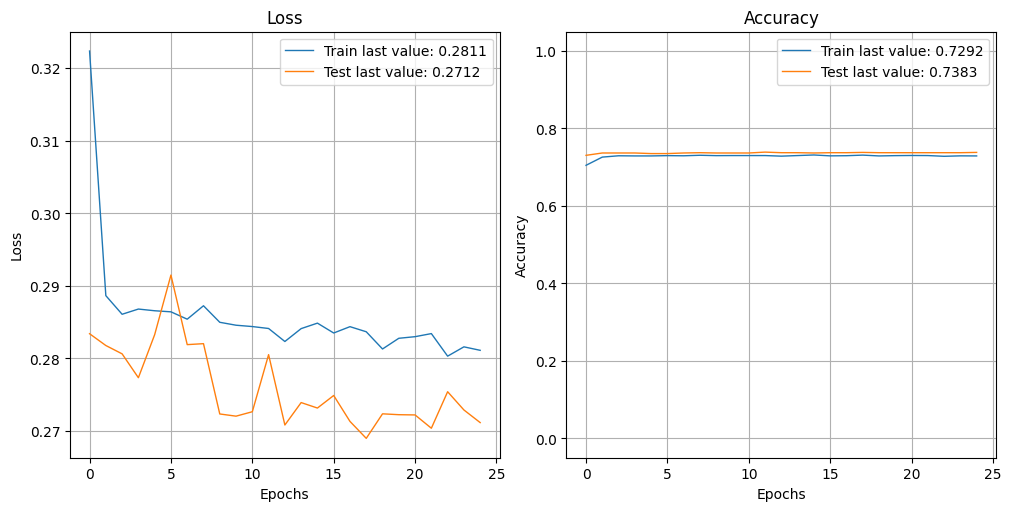

In [231]:
plot_history(history0)

In [232]:
model0.evaluate(x_test_normal, y_test)

42/42 [==============================] - 0s 3ms/step - loss: 0.2712 - accuracy: 0.7383


[0.2711549699306488, 0.7382753491401672]

In [233]:
# Loading the best model to make predictions on the data

model_0 = tf.keras.models.load_model("spaceship_model/model0_dense/")
model_0_preds = model_0.predict(x_test_normal)

42/42 [==============================] - 0s 2ms/step


In [234]:
from sklearn.metrics import accuracy_score

In [235]:
model_0_accuracy = accuracy_score(y_true=y_test,
                                 y_pred=tf.round(model_0_preds))

print(f"We saved the best model and we predicted the validation data on it. The accuracy of it is {int(model_0_accuracy*100)}%")

We saved the best model and we predicted the validation data on it. The accuracy of it is 73%


In [236]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [237]:
# Building another dense model with Sequential API

tf.random.set_seed(42)

# 1. Create a model

model1 = tf.keras.Sequential([
    tf.keras.Input(shape=(x_train_normal[1].shape)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
], name="model1_dense")


# 2. Compile the model

model1.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics = ["accuracy"])

# 3. Fit the model

history1 = model1.fit(x_train_normal,y_train,
                      epochs=50,
                      verbose = 2,
                      validation_data=(x_test_normal, y_test),
                      callbacks=[modelcheckpoint(model1.name)])

Epoch 1/50
166/166 - 1s - loss: 0.4086 - accuracy: 0.6879 - val_loss: 0.3277 - val_accuracy: 0.7307 - 1s/epoch - 8ms/step
Epoch 2/50
166/166 - 1s - loss: 0.3005 - accuracy: 0.7216 - val_loss: 0.2843 - val_accuracy: 0.7239 - 676ms/epoch - 4ms/step
Epoch 3/50
166/166 - 1s - loss: 0.2807 - accuracy: 0.7273 - val_loss: 0.2743 - val_accuracy: 0.7300 - 570ms/epoch - 3ms/step
Epoch 4/50
166/166 - 1s - loss: 0.2731 - accuracy: 0.7347 - val_loss: 0.2664 - val_accuracy: 0.7443 - 681ms/epoch - 4ms/step
Epoch 5/50
166/166 - 1s - loss: 0.2669 - accuracy: 0.7474 - val_loss: 0.2595 - val_accuracy: 0.7617 - 695ms/epoch - 4ms/step
Epoch 6/50
166/166 - 1s - loss: 0.2624 - accuracy: 0.7526 - val_loss: 0.2552 - val_accuracy: 0.7625 - 696ms/epoch - 4ms/step
Epoch 7/50
166/166 - 1s - loss: 0.2593 - accuracy: 0.7515 - val_loss: 0.2526 - val_accuracy: 0.7595 - 660ms/epoch - 4ms/step
Epoch 8/50
166/166 - 1s - loss: 0.2570 - accuracy: 0.7525 - val_loss: 0.2492 - val_accuracy: 0.7617 - 670ms/epoch - 4ms/step
Epo

(<Figure size 1000x500 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

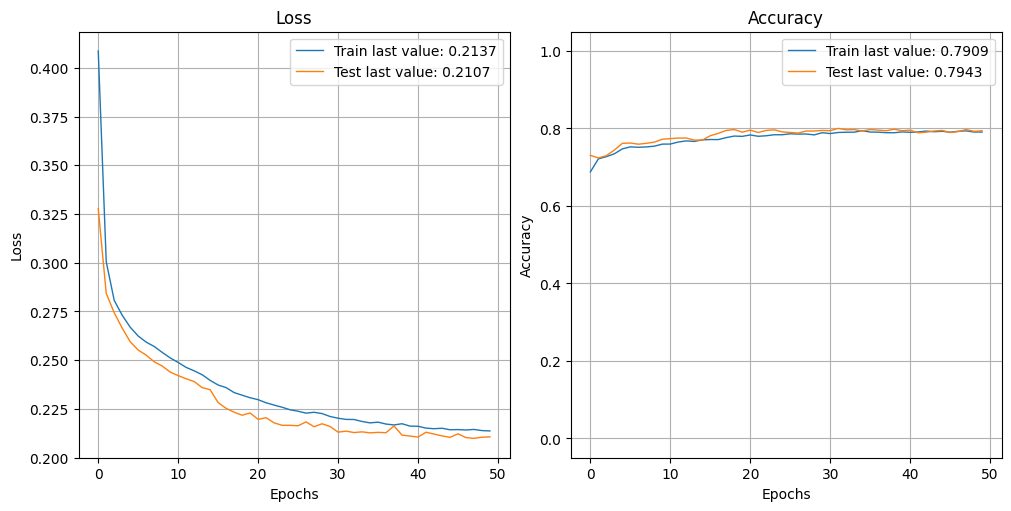

In [238]:
plot_history(history1)

In [239]:
model1.evaluate(x_test_normal, y_test)

42/42 [==============================] - 0s 4ms/step - loss: 0.2107 - accuracy: 0.7943


[0.21067608892917633, 0.7942511439323425]

In [240]:
# Loading the best model to make predictions 
model_1 = tf.keras.models.load_model("spaceship_model/model1_dense/")
model_1_preds = model_1.predict(x_test_normal)

model_1_accuracy = accuracy_score(y_true=y_test,
                                 y_pred=tf.round(model_1_preds))

print(f"We saved the best model and we predicted the validation data on it. The accuracy of it is {int(model_1_accuracy*100)}%")

42/42 [==============================] - 0s 3ms/step
We saved the best model and we predicted the validation data on it. The accuracy of it is 78%


In [241]:
# Creating another dim for the Conv1D model

x_train_normal_expanded = np.stack(x_train_normal, axis=0)  
x_test_normal_expanded = np.stack(x_test_normal, axis=0)  

In [242]:
x_train_normal_expanded.shape

(5284, 17)

In [243]:
x_train_normal.shape, x_test_normal_expanded.shape

((5284, 17), (1322, 17))

In [244]:
y_train.shape

(5284,)

In [245]:
tf.random.set_seed(42)

# Creating a Conv1D model with Functional API

inputs = layers.Input(shape=((x_train_normal_expanded.shape[1],1)))
x = layers.Conv1D(64, 3, activation="relu")(inputs)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model2 = tf.keras.Model(inputs, outputs, name="model2_conv1d")


In [246]:
model2.summary()


Model: "model2_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 17, 1)]           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 15, 64)            256       
                                                                 
 global_max_pooling1d_4 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_32 (Dense)            (None, 64)                4160      
                                                                 
 dense_33 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
___________________________________________________

In [247]:

model2.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics = ["accuracy"])

# 3. Fit the model

history2 = model2.fit(x_train_normal_expanded,y_train,
                      epochs=25,
                      verbose = 0,
                      batch_size=128,
                      validation_data=(x_test_normal_expanded, y_test),
                      callbacks=[modelcheckpoint(model2.name)])

In [248]:
model2.evaluate(x_test_normal_expanded, y_test)

42/42 [==============================] - 0s 4ms/step - loss: 0.3406 - accuracy: 0.6573


[0.34055522084236145, 0.6573373675346375]

In [249]:
# Loading the best model to make predictions 
model_2 = tf.keras.models.load_model("spaceship_model/model2_conv1d/")
model_2_preds = model_2.predict(x_test_normal_expanded)

model_2_accuracy = accuracy_score(y_true=y_test,
                                 y_pred=tf.round(model_2_preds))

print(f"We saved the best model and we predicted the validation data on it. The accuracy of it is {int(model_2_accuracy*100)}%")

42/42 [==============================] - 0s 3ms/step
We saved the best model and we predicted the validation data on it. The accuracy of it is 72%


In [250]:
import xgboost as xgb

In [251]:
train = xgb.DMatrix(x_train_normal, y_train)
test = xgb.DMatrix(x_test_normal, y_test)

In [252]:
params = {"learning_rate": 0.001,
          "max_depth": 5}

In [253]:
# Creating another model with XGBoost

model3 = xgb.train(params, train, evals=[(test, "validation")],
                   num_boost_round=100, early_stopping_rounds=20)

[0]	validation-rmse:0.49979
[1]	validation-rmse:0.49959
[2]	validation-rmse:0.49938
[3]	validation-rmse:0.49918
[4]	validation-rmse:0.49897
[5]	validation-rmse:0.49877
[6]	validation-rmse:0.49856
[7]	validation-rmse:0.49836
[8]	validation-rmse:0.49816
[9]	validation-rmse:0.49795
[10]	validation-rmse:0.49775
[11]	validation-rmse:0.49755
[12]	validation-rmse:0.49734
[13]	validation-rmse:0.49714
[14]	validation-rmse:0.49694
[15]	validation-rmse:0.49674
[16]	validation-rmse:0.49654
[17]	validation-rmse:0.49634
[18]	validation-rmse:0.49614
[19]	validation-rmse:0.49594
[20]	validation-rmse:0.49574
[21]	validation-rmse:0.49554
[22]	validation-rmse:0.49534
[23]	validation-rmse:0.49514
[24]	validation-rmse:0.49494
[25]	validation-rmse:0.49474
[26]	validation-rmse:0.49454
[27]	validation-rmse:0.49434
[28]	validation-rmse:0.49415
[29]	validation-rmse:0.49395
[30]	validation-rmse:0.49375
[31]	validation-rmse:0.49356
[32]	validation-rmse:0.49336
[33]	validation-rmse:0.49317
[34]	validation-rmse:0.4

In [254]:
model3_preds = model3.predict(test)
model3_accuracy = accuracy_score(y_test, tf.round(model3_preds))

print(f"We predicted the XGBOOST model on the validation data. The accuracy of it is: {int(model3_accuracy*100)}%")

We predicted the XGBOOST model on the validation data. The accuracy of it is: 77%


In [255]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [256]:
test_data.Destination.value_counts()

TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

In [257]:
test_data.HomePlanet.value_counts()

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

In [258]:
test_data.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [259]:
test_data["PassengerId"] = pd.factorize(test_data["PassengerId"])[0].astype(float)

In [260]:
test_data = test_data.dropna(how='any',axis=0)

In [261]:
new_test_data = test_data.drop(["Cabin", "Name"], axis=1)

In [262]:
ct.fit(new_test_data)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['Age', 'RoomService', 'FoodCourt',
                                  'ShoppingMall', 'Spa', 'VRDeck',
                                  'PassengerId']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['HomePlanet', 'Destination', 'VIP',
                                  'CryoSleep'])])

In [263]:
test_df = ct.transform(new_test_data)

In [264]:
test_df.shape

(3281, 17)

#### Make predictions on the best performing model on the real test data

In [267]:
best_model_preds = model_1.predict(test_df)
best_model_preds.shape

103/103 [==============================] - 0s 2ms/step


(3281, 1)

In [268]:
model_best = tf.squeeze(tf.round(best_model_preds))
model_best

<tf.Tensor: shape=(3281,), dtype=float32, numpy=array([1., 0., 1., ..., 0., 1., 1.], dtype=float32)>

In [269]:
prediction = pd.DataFrame({"Name": test_data.Name,"Transported": model_best})
prediction["Transported"] = prediction["Transported"].replace({0: False, 1: True})
prediction

,Name,Transported
0,Nelly Carsoning,True
1,Lerome Peckers,False
2,Sabih Unhearfus,True
3,Meratz Caltilter,True
4,Brence Harperez,False
...,...,...
4269,Loisey Heney,True
4270,Toate Cure,True
4271,Danna Peter,False
4272,Jeron Peter,True
